#### Context

From a Medical Insurance Costs dataset we'll build models using Regression to predict individual insurance costs. To help us with this task we have some informations of the persons with insurance, like the Age, Sex, BMI, Children, Smoker and Region. In this notebook we'll clean and organize the data, build the models and compare the results.

#### Libraries

In [1]:
# Dataframe/numerical libraries'
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Pre-processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

#### Data Analysis

In [12]:
# Read dataset
insurance = pd.read_csv(r'C:\Users\Murillo\Desktop\Python\Portfolio\Insurance\insurance.csv', sep=',')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
insurance.shape

(1338, 7)

In [13]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
# Checking duplicate values
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
# Drop the duplicates values
insurance.drop_duplicates(inplace=True)

In [19]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


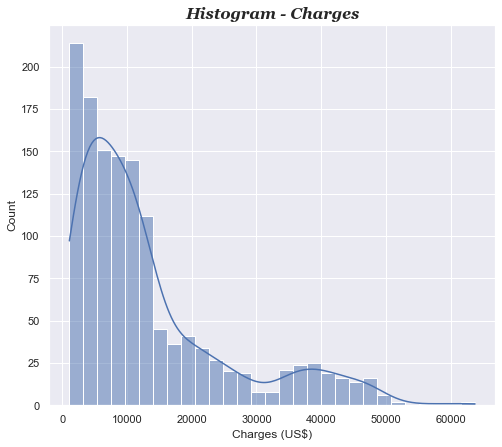

In [87]:
# Plots settings
plt.figure(figsize=(8, 7))
sns.set_theme(color_codes=True)

# Charges histogram
sns.histplot(insurance.charges, kde=True)
plt.title('Histogram - Charges', fontdict={'fontweight':'bold', 'fontsize':16, 'family':'Georgia', 'style':'italic'})
plt.xlabel('Charges (US$)')
plt.show;

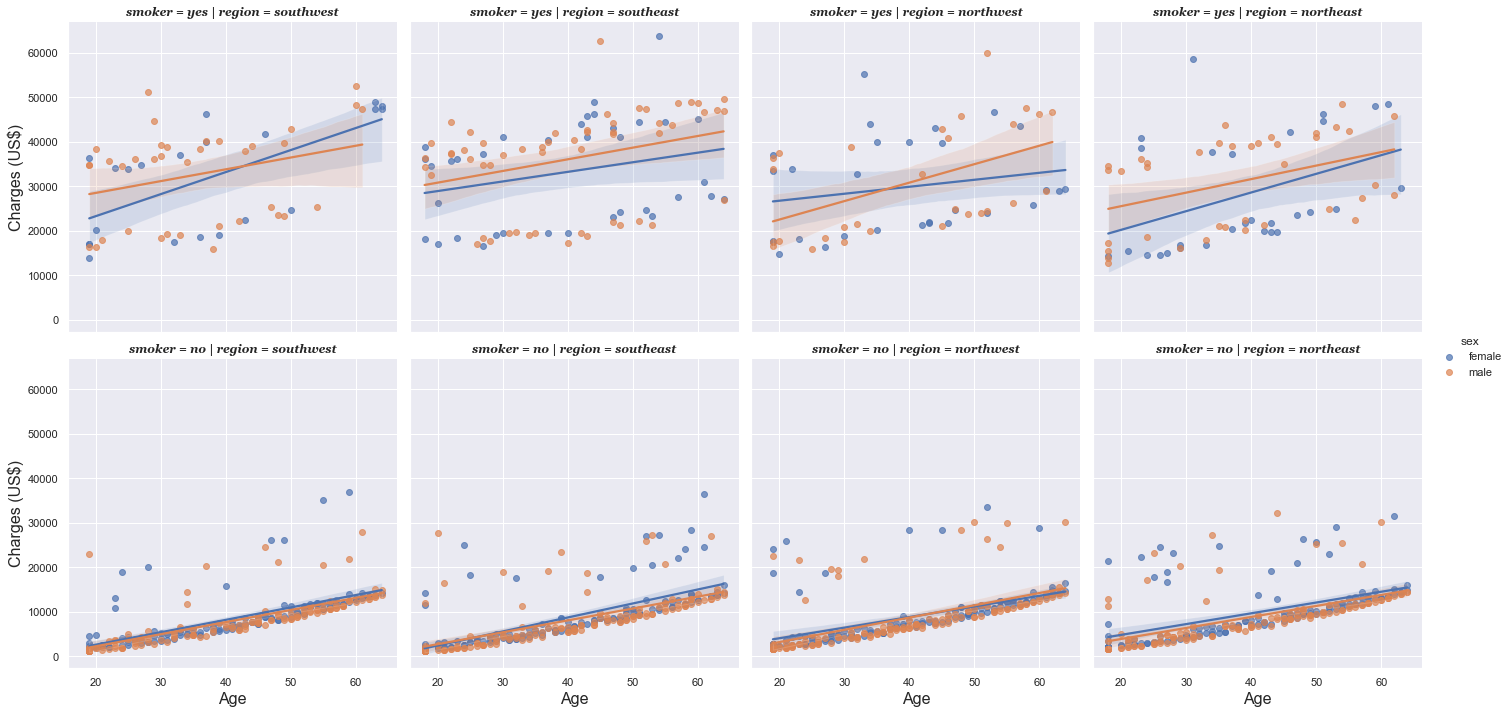

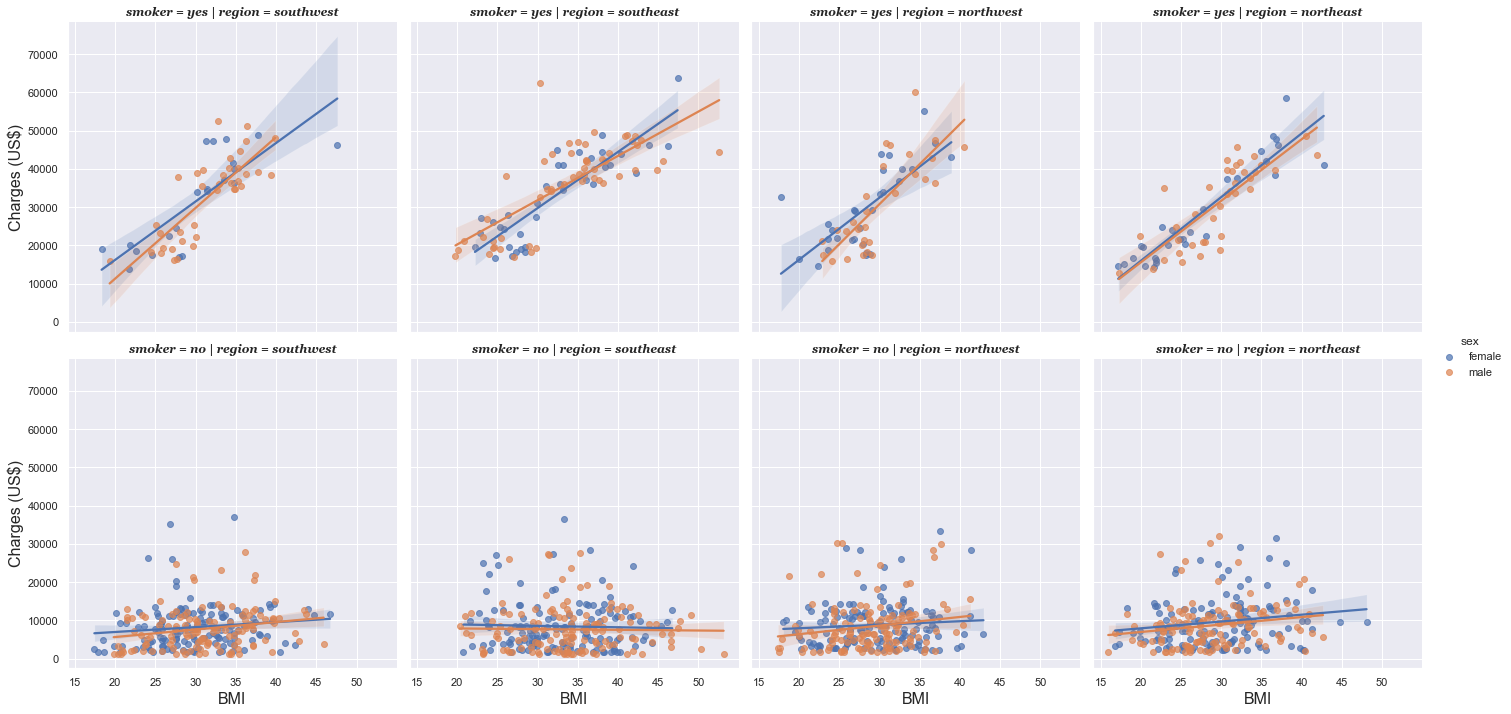

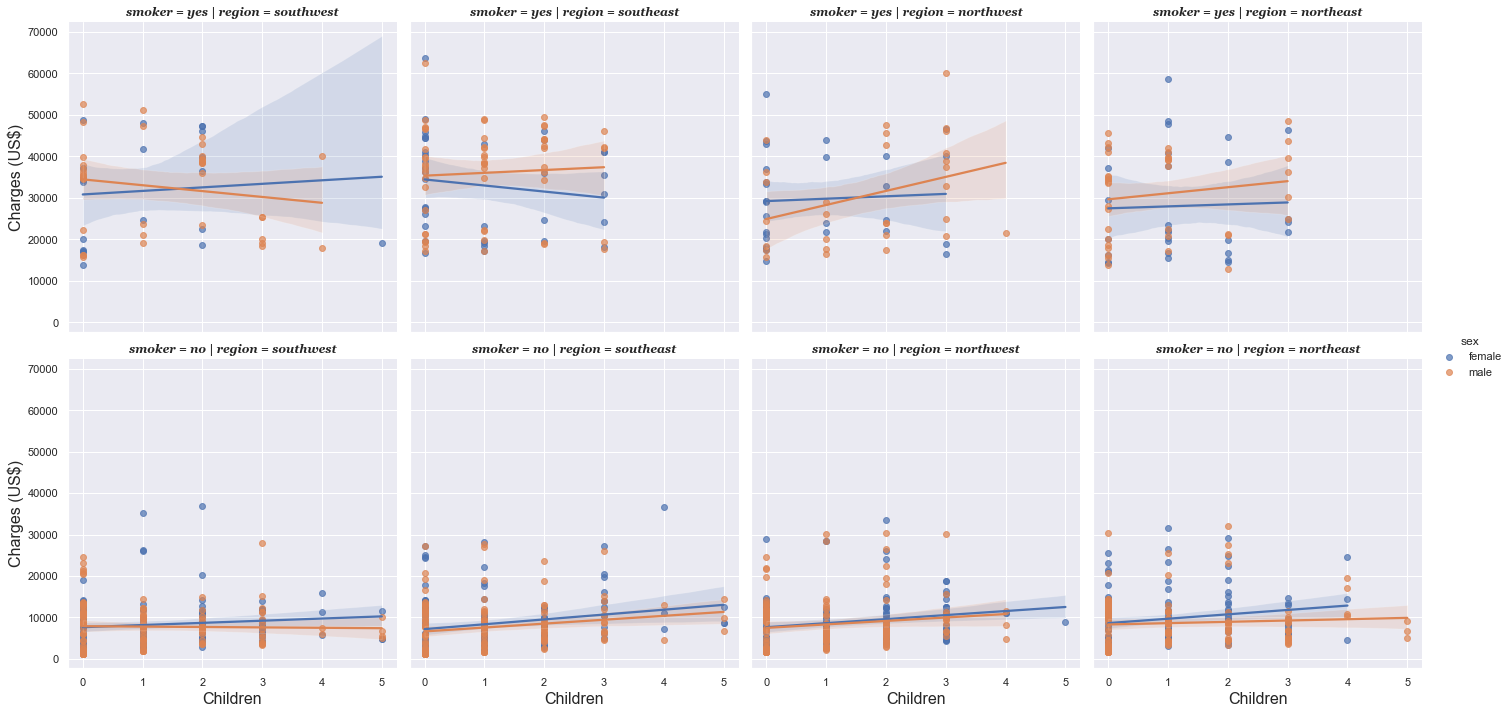

In [88]:
# Relations between features and target
f = sns.lmplot(x='age', y='charges', hue='sex', col='region', row='smoker', scatter_kws={'alpha':0.7}, data=insurance)
f.set_axis_labels("Age", "Charges (US$)", size=16).set_titles(fontweight='bold', fontsize=14, family='Georgia', style='italic')

g = sns.lmplot(x='bmi', y='charges', hue='sex', col='region', row='smoker', scatter_kws={'alpha':0.7}, data=insurance)
g.set_axis_labels("BMI", "Charges (US$)", size=16).set_titles(fontweight='bold', fontsize=14, family='Georgia', style='italic')

h = sns.lmplot(x='children', y='charges', hue='sex', col='region', row='smoker', scatter_kws={'alpha':0.7}, data=insurance)
h.set_axis_labels("Children", "Charges (US$)", size=16).set_titles(fontweight='bold', fontsize=14, family='Georgia', style='italic')

plt.show;

#### Preprocessing

In [31]:
# Separating numericals and categoricals columns
numerics = ['age', 'bmi', 'children']
categoricals = ['sex', 'smoker', 'region']

In [32]:
prep = make_column_transformer((StandardScaler(), numerics), (OneHotEncoder(), categoricals), remainder='passthrough')

#### Features and Target

In [65]:
X = insurance.drop('charges', axis=1)
y = insurance.charges

In [66]:
# Splitting the features and target in training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#### Regression Models

In [67]:
random = RandomForestRegressor()
gbt = GradientBoostingRegressor()

#### RandomForest

In [97]:
pipe_rand = make_pipeline(prep, random)
pipe_rand.fit(X_train, y_train)
y_predict_rand = pipe_rand.predict(X_test)
mse = mean_squared_error(y_test, y_predict_rand)
r2 = r2_score(y_test, y_predict_rand)

print('y_predict:',np.around(y_predict_rand[0:5], 2), '\ny_test:', np.around(np.array(y_test[0:5]), 2),
      '\nMean Squared Error:', mse, '\nR2:', r2)

y_predict: [ 4692.54  1849.21 10835.06 14451.86  5815.78] 
y_test: [ 3578.    1708.93  9630.4  12644.59  1526.31] 
Mean Squared Error: 17708966.913460974 
R2: 0.8820546772602789


#### GradientBoosting

In [98]:
pipe_gbt = make_pipeline(prep, gbt)
pipe_gbt.fit(X_train, y_train)
y_predict_gbt = pipe_gbt.predict(X_test)
mse = mean_squared_error(y_test, y_predict_gbt)
r2 = r2_score(y_test, y_predict_gbt)

print('y_predict:',np.around(y_predict_gbt[0:5], 2), '\ny_test:', np.around(np.array(y_test[0:5]), 2),
      '\nMean Squared Error:', mse, '\nR2:', r2)

y_predict: [ 5822.15  2746.66 11176.3  14928.75  2592.42] 
y_test: [ 3578.    1708.93  9630.4  12644.59  1526.31] 
Mean Squared Error: 15088754.984360855 
R2: 0.8995058218207936


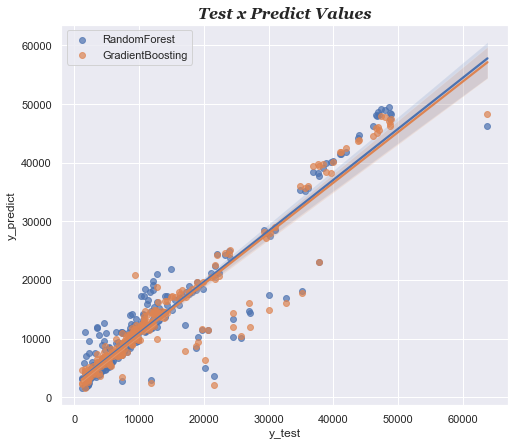

In [92]:
# Plotting y_test vs y_predict
plt.figure(figsize=(8, 7))
sns.regplot(x=y_test, y=y_predict_rand, scatter_kws={'alpha':0.7}, label='RandomForest')
sns.regplot(x=y_test, y=y_predict_gbt, scatter_kws={'alpha':0.7}, label='GradientBoosting')
plt.title('Test x Predict Values', fontdict={'fontweight':'bold', 'fontsize':16, 'family':'Georgia', 'style':'italic'})
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.legend()
plt.show;

#### Selecting New Features

In [80]:
X_select = insurance[['age', 'bmi', 'children', 'smoker', 'region']]

In [81]:
prep_select = make_column_transformer((StandardScaler(), numerics), (OneHotEncoder(), ['smoker', 'region']), remainder='passthrough')

In [82]:
X_train_select, X_test_select, y_train, y_test = train_test_split(X_select, y, test_size=0.2, random_state=20)

#### RandomForest

In [99]:
pipe_rand_select = make_pipeline(prep_select, random)
pipe_rand_select.fit(X_train_select, y_train)
y_pred_rand = pipe_rand_select.predict(X_test_select)
mse = mean_squared_error(y_test, y_pred_rand)
r2 = r2_score(y_test, y_pred_rand)

print('y_predict:',np.around(y_pred_rand[0:5], 2), '\ny_test:', np.around(np.array(y_test[0:5]), 2),
      '\nMean Squared Error:', mse, '\nR2:', r2)

y_predict: [ 3466.94  2079.64 10624.08 14397.2   4631.71] 
y_test: [ 3578.    1708.93  9630.4  12644.59  1526.31] 
Mean Squared Error: 17379163.329736155 
R2: 0.8842512362302757


#### GradientBoosting

In [84]:
pipe_gbt_select = make_pipeline(prep_select, gbt)
pipe_gbt_select.fit(X_train_select, y_train)
y_pred_gbt = pipe_gbt_select.predict(X_test_select)
mse = mean_squared_error(y_test, y_pred_gbt)
r2 = r2_score(y_test, y_pred_gbt)

print('y_predict:',np.around(y_pred_gbt[0:5], 2), '\ny_test:', np.around(np.array(y_test[0:5]), 2),
      '\nMean Squared Error:', mse, '\nR2:', r2)

y_predict: [ 5247.08  3073.17 11280.84 14660.03  2846.74] 
y_test: [ 3578.    1708.93  9630.4  12644.59  1526.31] 
Mean Squared Error: 14466576.66916136 
R2: 0.9036496559894645


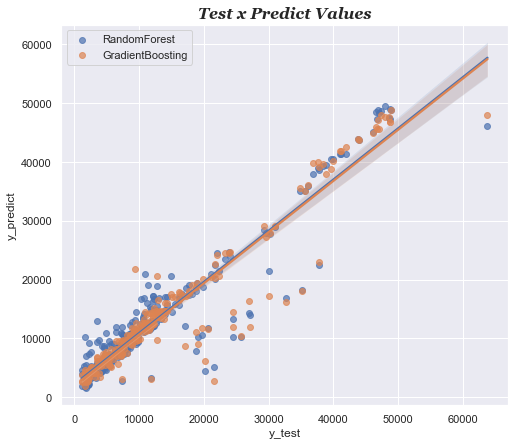

In [91]:
# Plotting new y_test vs y_predict
plt.figure(figsize=(8, 7))
sns.regplot(x=y_test, y=y_pred_rand, scatter_kws={'alpha':0.7}, label='RandomForest')
sns.regplot(x=y_test, y=y_pred_gbt, scatter_kws={'alpha':0.7}, label='GradientBoosting')
plt.title('Test x Predict Values', fontdict={'fontweight':'bold', 'fontsize':16, 'family':'Georgia', 'style':'italic'})
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.legend()
plt.show;

#### Conclusion

We had good results, with the **GradientBoostingRegressor** being a little better than RandomForestRegressor. The best score of **R2** was **0.9036** and a **Mean Squared Error** of **14466576.67**.